# **Install + Download folder Drive**

In [ ]:
!pip -q install gdown rtdl-revisiting-models torchmetrics

!rm -rf UAP-ML
!mkdir -p UAP-ML

!gdown --folder "https://drive.google.com/drive/folders/1yn0o_o6sLMnecB1MoQGOlAldd4ydh8pP?usp=drive_link" -O UAP-ML

!ls -lah UAP-ML
!ls -lah UAP-ML/models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 9.9 MB/s eta 0:00:00
Retrieving folder contents
Retrieving folder 14ePNpxKRfSvLcp-UHsA4PAlhM0uGDyDU models
Processing file 1OlthHP0a_PpV4btSzi9cAd6ix2zujD9X feature_cols.pkl
Processing file 19KurDFcnyf_LbwLHNi_qPaD3AS42faRh label_encoder_tabnet.pkl
Processing file 175q_0HPi0uqk3EFbEAaVPid2zNrPukc7 label_encoder.pkl
Processing file 1O3c90JLv2e9RSpzEzh6P7cGhrCP6Xsot mlp_model.h5
Processing file 1c6Znyew5MljFE4fd1QvnEsRRIdA4h0fD preprocess.pkl
Processing file 1q7qLy8HylzAod6cHmmeVyov2DGXQb6St svd_tabnet.pkl
Processing file 1TAM72l0b_WibaM5Z2BlV_Hezq8keAB3E tabnet_model.zip
Processing file 1MBM4CVFygg4KuQNynWETR_8gjJ-zKamX top_genres.pkl
Processing file 1T_GLCDbLTzi3rTVut7RHT8S0rsNXuGyi mal_anime.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1OlthHP0a_PpV4btSzi9cAd6ix2zujD9X
To: /content/UAP-ML/models/feature_cols.pkl


# **Import**

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# **Load dataset + artifacts (top_genres, feature_cols)**

In [ ]:
BASE_DIR = Path("UAP-ML")
MODEL_DIR = BASE_DIR / "models"

df = pd.read_csv(BASE_DIR / "mal_anime.csv")
top_genres = joblib.load(MODEL_DIR / "top_genres.pkl")

# feature_cols.pkl kamu berisi (num_cols, cat_cols)
num_cols, cat_cols = joblib.load(MODEL_DIR / "feature_cols.pkl")

print("Dataset shape:", df.shape)
print("Num cols:", len(num_cols), "| Cat cols:", len(cat_cols))
print("Top genres:", list(top_genres))
display(df.head())

Dataset shape: (19931, 25)
Num cols: 3 | Cat cols: 21
Top genres: ['Comedy', 'Action', 'Adventure', 'Drama', 'Hentai', 'Fantasy', 'Slice of Life', 'Sci-Fi']


,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


# **Buat target main_genre + filter top_genres (konsisten)**

In [ ]:
df["main_genre"] = df["Genres"].astype(str).str.split(",").str[0].str.strip()
df = df[df["main_genre"].isin(top_genres)].copy()

print("Shape after filtering:", df.shape)
display(df["main_genre"].value_counts())

Shape after filtering: (16458, 26)


,count
main_genre,
Comedy,4961
Action,4291
Adventure,2201
Drama,1357
Hentai,1284
Fantasy,1049
Slice of Life,665
Sci-Fi,650


# **Siapkan X,y (gunakan num_cols + cat_cols)**

In [ ]:
# pastikan kolom num/cat yang tersimpan memang ada di df
use_num = [c for c in num_cols if c in df.columns]
use_cat = [c for c in cat_cols if c in df.columns]

X = df[use_num + use_cat].copy()
y = df["main_genre"].copy()

print("X shape:", X.shape, "| y shape:", y.shape)
print("Used num:", len(use_num), "Used cat:", len(use_cat))
display(X.head())

X shape: (16458, 24) | y shape: (16458,)
Used num: 3 Used cat: 21


,myanimelist_id,Released_Year,Score,description,image,Type,Episodes,Status,Premiered,Released_Season,...,Producers,Demographic,Duration,Rating,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,1998.0,8.75,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,...,"Bandai Visual, Victor Entertainment, Audio Pla...",NaN,24 min. per ep.,R - 17+ (violence & profanity),#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,NaN,8.38,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,...,"Sunrise, Bandai Visual",NaN,1 hr. 55 min.,R - 17+ (violence & profanity),#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,1998.0,8.22,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,...,"Victor Entertainment, Arts Pro",Shounen,24 min. per ep.,PG-13 - Teens 13 or older,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,2002.0,7.23,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,...,"Bandai Visual, Dentsu, Victor Entertainment",NaN,25 min. per ep.,PG-13 - Teens 13 or older,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,2004.0,6.92,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,...,"TV Tokyo, Dentsu",Shounen,23 min. per ep.,PG - Children,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


# **Split (SAMA random_state=42 agar fair)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode target
y_le = LabelEncoder()
y_train_enc = y_le.fit_transform(y_train)
y_test_enc  = y_le.transform(y_test)

print("Classes:", list(y_le.classes_))

Classes: ['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Hentai', 'Sci-Fi', 'Slice of Life']


# **Preprocess untuk FT-Transformer (NO OneHot)**

In [ ]:
# ---- numeric ----
num_imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train_num = num_imputer.fit_transform(X_train[use_num])
X_test_num  = num_imputer.transform(X_test[use_num])

X_train_num = scaler.fit_transform(X_train_num)
X_test_num  = scaler.transform(X_test_num)

# ---- categorical -> integer ids per kolom ----
cat_encoders = {}
X_train_cat = np.zeros((len(X_train), len(use_cat)), dtype=np.int64)
X_test_cat  = np.zeros((len(X_test),  len(use_cat)), dtype=np.int64)

for j, col in enumerate(use_cat):
    enc = LabelEncoder()

    # isi missing
    tr = X_train[col].astype(str).fillna("MISSING")
    te = X_test[col].astype(str).fillna("MISSING")

    enc.fit(tr)
    cat_encoders[col] = enc

    X_train_cat[:, j] = enc.transform(tr)

    # handle kategori baru di test -> map ke "MISSING" kalau tidak dikenal
    te_vals = te.values
    known = set(enc.classes_)
    te_vals = np.array([v if v in known else "MISSING" for v in te_vals], dtype=object)
    if "MISSING" not in known:
        # kalau MISSING belum ada di train, tambahkan (jarang)
        enc.classes_ = np.append(enc.classes_, "MISSING")
        known = set(enc.classes_)
        te_vals = np.array([v if v in known else "MISSING" for v in te_vals], dtype=object)

    X_test_cat[:, j] = enc.transform(te_vals)

# Cardinalities (jumlah kategori per kolom) untuk embedding
cat_cardinalities = [len(cat_encoders[c].classes_) for c in use_cat]

print("Numeric:", X_train_num.shape, "Categorical:", X_train_cat.shape)
print("Example cat cardinalities:", cat_cardinalities[:10])

Numeric: (13166, 3) Categorical: (13166, 21)
Example cat cardinalities: [11532, 13150, 9, 290, 4, 245, 6, 19, 621, 809]


# **Build FT-Transformer (Pretrained 2)**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import rtdl_revisiting_models as rtdl

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ===== Dataset wrapper =====
class TabDataset(Dataset):
    def __init__(self, X_num, X_cat, y):
        self.X_num = torch.tensor(X_num, dtype=torch.float32)
        self.X_cat = torch.tensor(X_cat, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X_num[idx], self.X_cat[idx], self.y[idx]

train_ds = TabDataset(X_train_num, X_train_cat, y_train_enc)
test_ds  = TabDataset(X_test_num,  X_test_cat,  y_test_enc)

train_loader = DataLoader(train_ds, batch_size=512, shuffle=True, num_workers=0)
test_loader  = DataLoader(test_ds,  batch_size=1024, shuffle=False, num_workers=0)

n_cont = X_train_num.shape[1]
n_classes = len(y_le.classes_)

# ===== FT-Transformer (VERSI INI WAJIB d_out & ffn_d_hidden_multiplier) =====
model = rtdl.FTTransformer(
    n_cont_features=n_cont,
    cat_cardinalities=cat_cardinalities,

    # backbone params
    d_block=192,
    n_blocks=3,
    attention_n_heads=8,
    attention_dropout=0.2,
    ffn_dropout=0.1,
    residual_dropout=0.0,

    # WAJIB di versi kamu:
    ffn_d_hidden_multiplier=4,  # umum dipakai: 4
    d_out=n_classes,            # output langsung logits kelas
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)

print("Model OK. n_cont_features:", n_cont, "| n_classes:", n_classes)

Device: cpu
Model OK. n_cont_features: 3 | n_classes: 8


# **Training Loop + History (Loss & Accuracy) ✅ UAP**

Epoch 01 | train_loss=0.9385 train_acc=0.6828 | val_loss=0.1550 val_acc=0.9629
Epoch 02 | train_loss=0.0579 train_acc=0.9883 | val_loss=0.0941 val_acc=0.9809
Epoch 03 | train_loss=0.0156 train_acc=0.9976 | val_loss=0.1153 val_acc=0.9842
Epoch 04 | train_loss=0.0064 train_acc=0.9994 | val_loss=0.1153 val_acc=0.9851
Epoch 05 | train_loss=0.0033 train_acc=0.9995 | val_loss=0.1077 val_acc=0.9854
Epoch 06 | train_loss=0.0025 train_acc=0.9998 | val_loss=0.1331 val_acc=0.9854
Epoch 07 | train_loss=0.0030 train_acc=0.9993 | val_loss=0.1335 val_acc=0.9851
Epoch 08 | train_loss=0.0027 train_acc=0.9995 | val_loss=0.1419 val_acc=0.9848
Epoch 09 | train_loss=0.0024 train_acc=0.9997 | val_loss=0.1377 val_acc=0.9854
Epoch 10 | train_loss=0.0015 train_acc=0.9998 | val_loss=0.1232 val_acc=0.9848
Epoch 11 | train_loss=0.0015 train_acc=0.9998 | val_loss=0.1411 val_acc=0.9854
Epoch 12 | train_loss=0.0007 train_acc=0.9999 | val_loss=0.1414 val_acc=0.9854
Epoch 13 | train_loss=0.0004 train_acc=1.0000 | val_

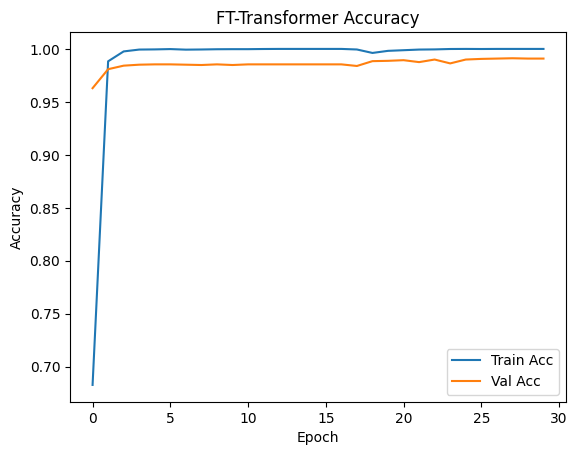

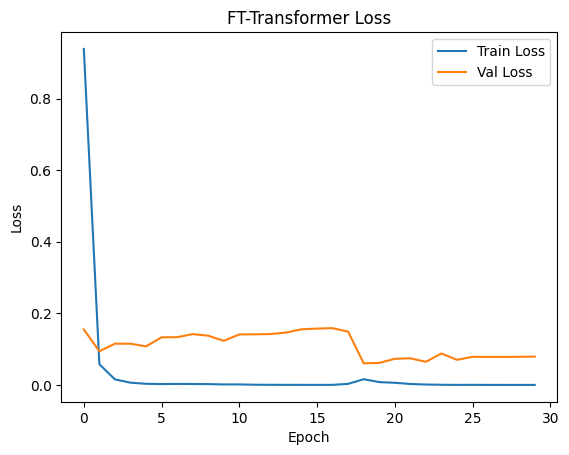

In [ ]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for x_num, x_cat, y in loader:
            x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)
            logits = model(x_num, x_cat)
            loss = criterion(logits, y)
            total_loss += loss.item() * y.size(0)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return total_loss / total, correct / total

EPOCHS = 30
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for x_num, x_cat, y in train_loader:
        x_num, x_cat, y = x_num.to(device), x_cat.to(device), y.to(device)

        optimizer.zero_grad()
        logits = model(x_num, x_cat)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        pred = logits.argmax(dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)

    tr_loss = total_loss / total
    tr_acc = correct / total
    va_loss, va_acc = evaluate(model, test_loader)

    train_losses.append(tr_loss)
    val_losses.append(va_loss)
    train_accs.append(tr_acc)
    val_accs.append(va_acc)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} train_acc={tr_acc:.4f} | val_loss={va_loss:.4f} val_acc={va_acc:.4f}")

# Plot Accuracy
plt.figure()
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("FT-Transformer Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("FT-Transformer Loss")
plt.legend()
plt.show()

# **Evaluasi Test (Classification Report + Confusion Matrix) ✅ UAP**

               precision    recall  f1-score   support

       Action       0.97      1.00      0.99       858
    Adventure       0.99      0.98      0.99       440
       Comedy       1.00      0.99      0.99       992
        Drama       1.00      0.99      1.00       272
      Fantasy       0.99      0.99      0.99       210
       Hentai       1.00      1.00      1.00       257
       Sci-Fi       1.00      1.00      1.00       130
Slice of Life       1.00      1.00      1.00       133

     accuracy                           0.99      3292
    macro avg       0.99      0.99      0.99      3292
 weighted avg       0.99      0.99      0.99      3292



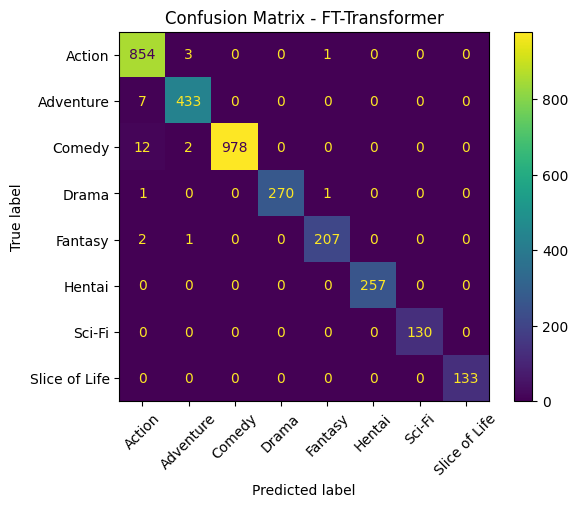

In [ ]:
# Prediksi test set
model.eval()
all_pred = []
all_true = []

with torch.no_grad():
    for x_num, x_cat, y in test_loader:
        x_num, x_cat = x_num.to(device), x_cat.to(device)
        logits = model(x_num, x_cat)
        pred = logits.argmax(dim=1).cpu().numpy()
        all_pred.append(pred)
        all_true.append(y.numpy())

y_pred = np.concatenate(all_pred)
y_true = np.concatenate(all_true)

print(classification_report(y_true, y_pred, target_names=y_le.classes_))

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=y_le.classes_).plot(xticks_rotation=45)
plt.title("Confusion Matrix - FT-Transformer")
plt.show()

# **Save Model + Preprocessors (buat Streamlit)**

In [ ]:
MODEL_DIR.mkdir(exist_ok=True)

# save torch model
torch.save(model.state_dict(), MODEL_DIR / "fttransformer.pt")

# save preprocessing objects
joblib.dump(y_le, MODEL_DIR / "label_encoder_ft.pkl")
joblib.dump(num_imputer, MODEL_DIR / "num_imputer_ft.pkl")
joblib.dump(scaler, MODEL_DIR / "scaler_ft.pkl")
joblib.dump(cat_encoders, MODEL_DIR / "cat_encoders_ft.pkl")
joblib.dump((use_num, use_cat, cat_cardinalities), MODEL_DIR / "ft_feature_spec.pkl")

print("Saved to:", MODEL_DIR)
print("-", MODEL_DIR / "fttransformer.pt")

Saved to: UAP-ML/models
- UAP-ML/models/fttransformer.pt
